In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

import numpy as np

%matplotlib inline

tf.__version__

'2.8.0'

# Prepare Dataset & Flatten

In [2]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


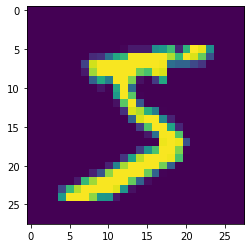

In [5]:
plt.imshow(X_train[0])

In [31]:
X_train_norm = X_train/255
X_test_norm = X_test/255

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_norm,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4688 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 2s 987us/step - loss: 0.3038 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 992us/step - loss: 0.2833 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9259


In [33]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 804us/step - loss: 45.1285 - accuracy: 0.9164


[45.12849044799805, 0.9164000153541565]

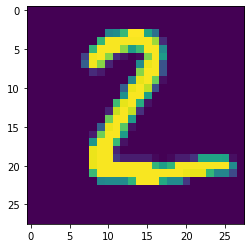

In [34]:
n = 1

plt.imshow(X_test[n])

In [35]:
predictions = model.predict(X_test)
np.argmax(predictions[n])

2

In [36]:
prediction_labels = [np.argmax(prediction) for prediction in predictions]
confusion_matrix(labels=y_test,predictions=prediction_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    2,    0,    0,    1,    0,    3,    0],
       [   0, 1121,    5,    1,    0,    1,    3,    1,    3,    0],
       [  48,   82,  864,    6,   11,    0,    4,    3,   12,    2],
       [  27,    4,  183,  784,    1,    3,    0,    2,    6,    0],
       [   7,    1,   10,   17,  934,    0,    5,    0,    8,    0],
       [  51,    7,   31,  251,   31,  492,    8,    0,   19,    2],
       [  55,    3,  230,    2,   61,   48,  556,    1,    2,    0],
       [  14,   15,   76,  421,   60,    5,    0,  432,    4,    1],
       [  18,   25,   71,  189,   23,   83,   21,   10,  533,    1],
       [  13,   11,    2,  126,  483,    5,    0,  187,   91,   91]],
      dtype=int32)>

In [47]:
len(model.get_weights()[1])

10